In [541]:
#Assignment 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for standardization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [543]:
%matplotlib inline

In [582]:
# 1. Load Advertising.csv dataset using pandas
data = pd.read_csv("Advertising.csv")

print(data.columns)
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.columns)
print(data)



Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [547]:
# data['TV']
# 2. Standardize each column of the dataset

# To be used for reverting standardized data
mean_tv = data['TV'].mean()
std_tv = data['TV'].std()

mean_radio = data['Radio'].mean()
std_radio = data['Radio'].std()

mean_newspaper = data['Newspaper'].mean()
std_newspaper = data['Newspaper'].std()

mean_sales = data['Sales'].mean()
std_sales = data['Sales'].std()

data['TV'] = (data['TV']-mean_tv) / std_tv
data['Radio'] = (data['Radio']-mean_radio) / std_radio
data['Newspaper'] = (data['Newspaper']-mean_newspaper) / std_newspaper
data['Sales'] = (data['Sales']-mean_sales) / std_sales

print(data)
 

           TV     Radio  Newspaper     Sales
0    0.967425  0.979066   1.774493  1.548168
1   -1.194379  1.080097   0.667903 -0.694304
2   -1.512360  1.524637   1.779084 -0.905135
3    0.051919  1.214806   1.283185  0.858177
4    0.393196 -0.839507   1.278593 -0.215143
..        ...       ...        ...       ...
195 -1.267759 -1.317724  -0.769287 -1.230964
196 -0.615491 -1.236899  -1.031011 -0.828469
197  0.348934 -0.940539  -1.109069 -0.234310
198  1.590574  1.261955   1.636743  2.199827
199  0.990720 -0.987687  -1.003461 -0.119311

[200 rows x 4 columns]


In [549]:
# 3. Add extra column of 1 for Bias
data["Bias"] = 1

# 4. Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively
# shuffle dataset
data = data.sample(frac=1, random_state=42)

train_ratio = 0.85
total_rows = data.shape[0]
train_size = int(total_rows*train_ratio)
 
# Split data into test and train
train = data[0:train_size]
test = data[train_size:]

# print train set
print("Train dataframe")
print(train)

# print test set
print("Test dataframe")
print(test)


Train dataframe
           TV     Radio  Newspaper     Sales  Bias
95   0.189362  0.561467   1.026052  0.551514     1
15   0.563251  1.645876   1.026052  1.605667     1
30   1.698897  0.339197   0.580661  1.414003     1
158 -1.576422  0.918447   0.672494 -1.288463     1
128  0.853278  1.733436  -1.256002  2.046495     1
..        ...       ...        ...       ...   ...
54   1.347138  0.372875  -0.672862  1.184006     1
107 -0.659752 -1.546730  -0.337671 -1.020133     1
50   0.614501 -1.358137   0.185779 -0.502640     1
196 -0.615491 -1.236899  -1.031011 -0.828469     1
58   0.742625  1.773849   0.328120  1.873997     1

[170 rows x 5 columns]
Test dataframe
           TV     Radio  Newspaper     Sales  Bias
48   0.933646 -0.502734   0.888302  0.149019     1
88  -0.684212  0.150605   1.967342 -0.215143     1
21   1.052452 -1.223428  -0.323896 -0.291809     1
57  -0.126290 -0.273729  -0.640720 -0.157644     1
160  0.296520 -0.347819   0.006704  0.072353     1
192 -1.512360 -1.290782   0

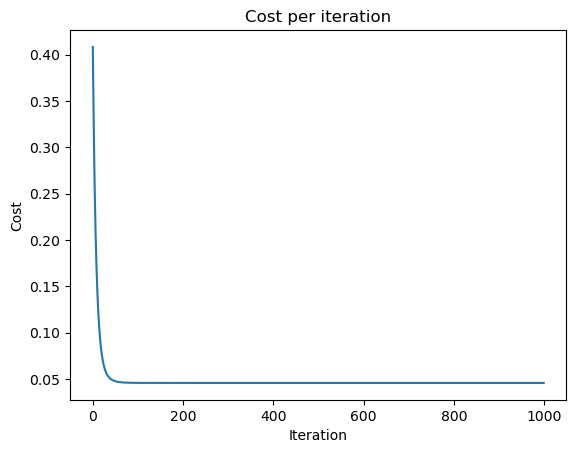

Final weights: [ 0.0097811   0.75511029  0.55156223 -0.02840375]


In [551]:
# 5. Fit the model on the training set
# X = pd.DataFrame(data)

np.random.seed(42)

def initialize_weights():
    # init_w = np.array([0.0, 0.0, 0.0, 0.0])
    init_w = np.random.rand(4)
          
    return init_w


def predict(X, weights):
    
    return np.dot(X, weights)
    

def compute_cost(X, y, weights):
    m = len(y)
    predictions = predict(X, weights)
    error = predictions - y
    cost = (1 / (2*m)) * np.sum(error** 2)
    return cost

def compute_gradient(X, y, weights):
    m = len(y)
    prediction = predict(X, weights)
    error = prediction - y
    gradient = (1 / m) * np.dot(X.T, error)
    return gradient

def update_weights(weights, gradient, alpha):
    return weights - alpha * gradient

def grad_descent(X, y, alpha, iterations):
    weights = initialize_weights()
    costs = []
    r2_scores = []

    for i in range(iterations):
        cost = compute_cost(X, y, weights)
        costs.append(cost)

        predictions = predict(X, weights)
        r2 = r2_score(y, predictions)
        r2_scores.append(r2)
        
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradient, alpha)

    return weights, costs

def plot_costs(costs):
    plt.plot(costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost per iteration')
    plt.show()

train_X = train[['Bias', 'TV', 'Radio', 'Newspaper']].values
train_Y = train['Sales'].values

test_X = test[['Bias', 'TV', 'Radio', 'Newspaper']].values
test_Y = test['Sales'].values


# scaler_Y = StandardScaler()
alpha = 0.05
iterations = 1000

final_weights, costs = grad_descent(train_X, train_Y, alpha, iterations)
plot_costs(costs)
print("Final weights:", final_weights)




In [552]:
# 5.8 and 6
# Predict y and calculate cost for train set
# train_predictions_original = scaler_Y.inverse_transform(train_predictions_standard.reshape(-1, 1)).flatten()
train_predictions_standard = predict(train_X, final_weights)
train_cost_standard = compute_cost(train_X, train_Y, final_weights)
print(f'Standardized Train Cost (MSE): {train_cost_standard}')

Standardized Train Cost (MSE): 0.04589996301421405


In [553]:
# 5.9 and 7
# Predict y and calculate cost for test set
test_predictions_standard = predict(test_X, final_weights)
test_cost_standard = compute_cost(test_X, test['Sales'].values, final_weights)
print(f'Standardized Test Cost (MSE): {test_cost_standard}\n')

Standardized Test Cost (MSE): 0.0829673496172198



In [594]:
# #8

# For training data
data['TV_original'] = (data['TV'] * std_tv) + mean_tv
data['Radio_original'] = (data['Radio'] * std_radio) + mean_radio
data['Newspaper_original'] = (data['Newspaper'] * std_newspaper) + mean_newspaper
data['Sales_original'] = (data['Sales'] * std_sales) + mean_sales

# print(data)

original_data = data[['TV_original', 'Radio_original', 'Newspaper_original','Sales_original']]
print(original_data.head())

# Split data into test and train
train_original = original_data[0:train_size]
test_original = original_data[train_size:]



    TV_original  Radio_original  Newspaper_original  Sales_original
0  19902.102276      584.473387         1537.634562      129.328290
1   3967.556016      606.743601         1012.769800       68.284048
2   1623.735365      704.732541         1539.812424       62.544846
3  13153.959302      636.437219         1304.603319      110.545446
4  15669.488426      183.609539         1302.425457       81.327690


In [596]:
# 9 Observe the cost results and analyse.

# Plot costs
# plot_costs(costs)

# Analyze results
print("Final weights:", final_weights)
print(f'Standardized Train Cost (MSE): {train_cost_standard}')
print(f'Standardized Test Cost (MSE): {test_cost_standard}')



Final weights: [ 0.0097811   0.75511029  0.55156223 -0.02840375]
Standardized Train Cost (MSE): 0.04589996301421405
Standardized Test Cost (MSE): 0.0829673496172198


In [ ]:
# Analysis:
# From the retrieved data using the gradient descent algorithm, it shows that
# the cost decreases as the iteration increases. This means that the gradient descent
# functions/implementations are working.

# The bias of the final weight have the smallest value which indicates that the model
# relies more on the features than the bias.

# Among all the features, TV got highest weight for the last iteration. This implies that
# the TV has the highest influence for the sales or predicting the value of sale.

# Radio is the second highest value after TV. The Newspaper feature by far has the lowest 
# effect for the sales.

# The Train Cost and Test Cost value affects the performance of the data. If the MSE for 
# train and test are lower, it is less likely to be overfitting. For the result of the
# current random seed, the MSE for train and test are small.

In [561]:
# Questions

In [ ]:
# 1 What are the optimal weights found by your implemented gradient descent? 
# Plug it into the linear model:

In [563]:
print(final_weights)

theta_0 = final_weights[0]
theta_1 = final_weights[1]
theta_2 = final_weights[2]
theta_3 = final_weights[3]

print(f'h_theta(x) = {theta_0:.3f} + {theta_1:.3f} TV + {theta_2:.3f} Radio + {theta_3:.3f} Newspaper')


[ 0.0097811   0.75511029  0.55156223 -0.02840375]
h_theta(x) = 0.010 + 0.755 TV + 0.552 Radio + -0.028 Newspaper


In [565]:
# The optimal weights are found during the last gradient descent iteration because
# it is closer to x-intercept than the previous weights. In this iteration, the most optimal
# weight is indeed calculated and it shows that this is the furthest values of weights at a
# given learning rate and iterations.

# As noticed from the resulting linear model, the optimal weights would return a value for the 
# bias depending on the random seed. The resulting prediction shows that TV having the highest
# value, meaning, it is the most effective feature for getting the sales.



In [ ]:
# 2 Provide a scatter plot of the 1𝑦5(,)2 𝑎𝑛𝑑 𝑦(() for both the train and test set. Is there a
# trend? Provide an r2 score (also available in sklearn).

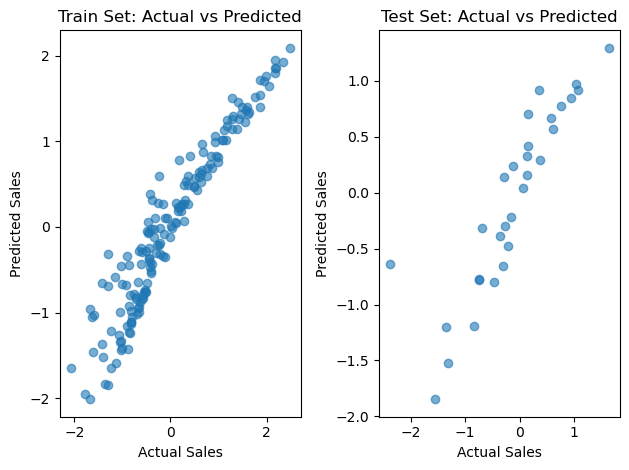

R^2 score for Train Set: 0.9118
R^2 score for Test Set: 0.7692


In [567]:

plt.subplot(1, 2, 1)
plt.scatter(train['Sales'], train_predictions_standard, alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Train Set: Actual vs Predicted')

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(test['Sales'], test_predictions_standard, alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

# R2 score for the train set
r2_train = r2_score(train['Sales'].values, train_predictions_standard)

# R2 score for the test set
r2_test = r2_score(test['Sales'].values, test_predictions_standard)

# R2 for train and test
print(f'R^2 score for Train Set: {r2_train:.4f}')
print(f'R^2 score for Test Set: {r2_test:.4f}')

In [ ]:
# 3.
# What happens to the error, r2, and cost as the number of iterations increase? Show your
# data and proof. You can alternatively plot your result data for visualization and check
# until 50000 iterations or more (actually).

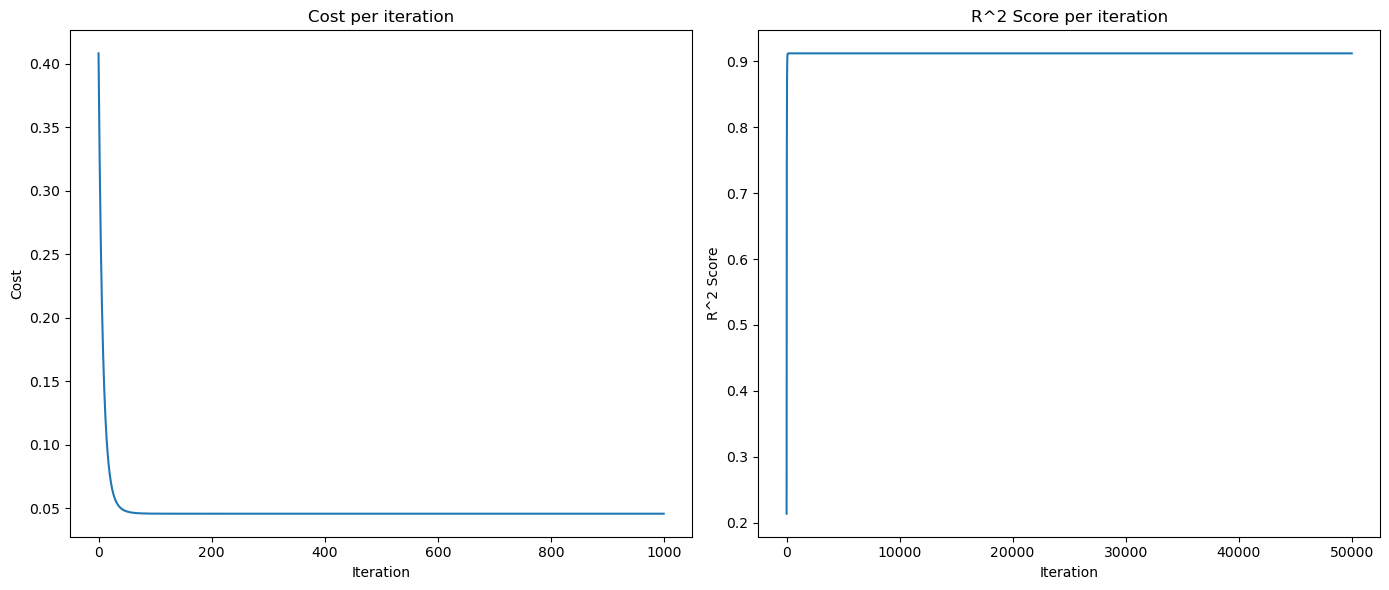

Final weights: [ 0.0097811   0.75511029  0.55156223 -0.02840375]
R^2 score for Train Set: 0.9118
R^2 score for Test Set: 0.7692


In [568]:

def grad_descent(X, y, alpha, iterations):
    weights = initialize_weights()
    costs = []
    r2_scores = []

    for i in range(iterations):
        cost = compute_cost(X, y, weights)
        costs.append(cost)

        predictions = predict(X, weights)
        r2 = r2_score(y, predictions)
        r2_scores.append(r2)
        
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradient, alpha)

    return weights, costs, r2_scores
alpha = 0.05
iterations = 50000  # Increase the number of iterations

plt.figure(figsize=(14, 6))

# Cost plot
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per iteration')

# R^2 score plot
plt.subplot(1, 2, 2)
plt.plot(r2_scores)
plt.xlabel('Iteration')
plt.ylabel('R^2 Score')
plt.title('R^2 Score per iteration')

plt.tight_layout()
plt.show()

# Final weights
print("Final weights:", final_weights)

# R2 score for the train set
train_predictions_original = (predict(train_X, final_weights) * std_sales) + mean_sales
r2_train = r2_score(train['Sales'].values, train_predictions_standard)

# R2 score for the test set
test_predictions_original = (predict(test_X, final_weights) * std_sales) + mean_sales
r2_test = r2_score(test['Sales'].values, test_predictions_standard)

# R2 for train and test
print(f'R^2 score for Train Set: {r2_train:.4f}')
print(f'R^2 score for Test Set: {r2_test:.4f}')

In [570]:
# 4. Once you determine the optimal number of iterations, check the effect on the cost and
# error as you change the learning rate. The common learning rates in machine learning
# include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
# the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
# PLOT. Provide your analysis.

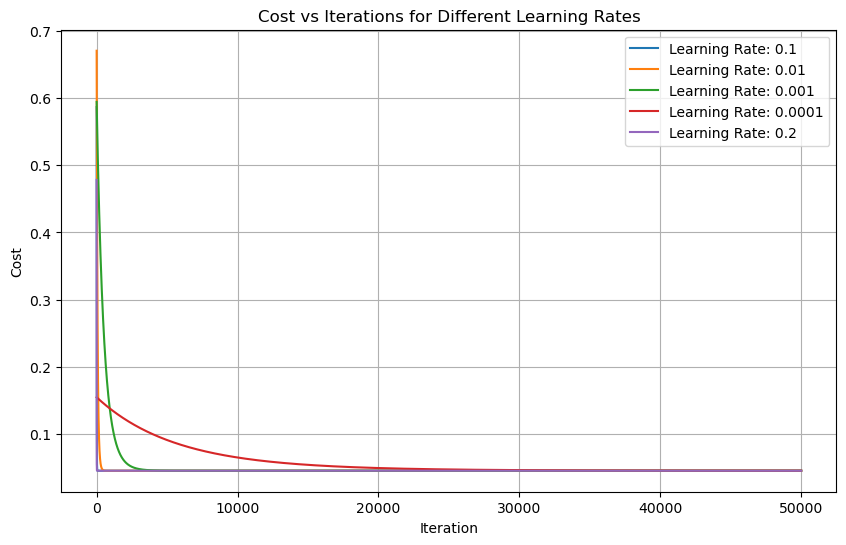

In [573]:
def lr_grad_descent(X, y, learning_rates, iterations):
    all_costs = {}
    
    for alpha in learning_rates:
        weights, costs, r2_scores = grad_descent(X, y, alpha, iterations)
        all_costs[alpha] = costs

    return all_costs

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
optimal_iterations = 50000

costs_dict = lr_grad_descent(train_X, train_Y, learning_rates, optimal_iterations)

# Plotting costs for all learning rates in one plot
plt.figure(figsize=(10, 6))

for alpha, costs in costs_dict.items():
    plt.plot(costs, label=f'Learning Rate: {alpha}')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

In [574]:
# 5. Is there a relationship on the learning rate and the number of iterations?

# There is indeed a relationship on the learning rate and the number of iterations.
# When the learning rate becomes smaller, the line becomes more curved as seen in the 
# plot above. The line for bigger learning rate tends to have an sudden change.
# When increasing the iteration, the line also become more curved or it will have a gradual
# descend, if the iteration is small, it would have a much straighter or sudden descent.

In [575]:
# # 6. Compare the results with the results of ordinary least squares function.
# #  Beta_hat = (X^TX)^-1X^Ty


In [576]:
beta = np.dot(np.dot(np.linalg.inv(np.dot(train_X.T,train_X)),train_X.T),train_Y)

print('OLS weights: ',beta)
print('Gradient Descent weights:', final_weights)

ols_pred_y_train = np.dot(train_X, beta)
ols_pred_y_test = np.dot(test_X, beta)

ols_r2_train = r2_score(train_Y, ols_pred_y_train)
ols_r2_test = r2_score(test_Y, ols_pred_y_test)

print('\n')
print(f'R^2 score for train using OLS: {ols_r2_train}')
print(f'R^2 score for test using OLS: {ols_r2_test}')

print('\n')
print(f'R^2 score for Train Set using gradient descent: {r2_train}')
print(f'R^2 score for Test Set gradient descent: {r2_test}')

OLS weights:  [ 0.0097811   0.75511029  0.55156223 -0.02840375]
Gradient Descent weights: [ 0.0097811   0.75511029  0.55156223 -0.02840375]


R^2 score for train using OLS: 0.9117664091958074
R^2 score for test using OLS: 0.7691651874205649


R^2 score for Train Set using gradient descent: 0.9117664091958074
R^2 score for Test Set gradient descent: 0.7691651874205653


In [598]:
# Both OLS and Gradient descent yields similar but with a very small variation
# between the two (at a fractional level). The weights are equal for a certain random seed.
# The R^2 train and test are the same at most part for both OLS and Gradient descent.
